#  <span style='color:indianred'>  Network Analysis using R Code </span>

**References:**
(1) Ognyanova, Katherine. Network Analysis and Visualization with R and igraph https://kateto.net/wp-content/uploads/2016/01/NetSciX_2016_Workshop.pdf

#  <span style='color:Purple'>  1. Install required packages </span>


In [ ]:
install.packages("ggraph")

#  <span style='color:Purple'>  2. Loading required packages </span>

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
library(jsonlite)

#  <span style='color:Purple'>  3. Loading data set  </span>

In [3]:
V_df <- jsonlite::fromJSON(txt = "./V_data.json", simplifyDataFrame = T)


#  <span style='color:Purple'>  4. Transforming data set in nodes and vertices  </span>

In [4]:
V_net <- routes_igraph <- graph_from_data_frame(d = V_df$network$edges, vertices = V_df$network$nodes[,1:2], directed = TRUE)

#  <span style='color:Purple'>  5. Visualize dataset  </span>

In [5]:
print(V_net)

IGRAPH 992fee6 DNW- 44 100 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 992fee6 (vertex names):
 [1] EVEY       ->INTERROGATOR EVEY       ->FATHER      
 [3] EVEY       ->VALERIE      EVEY       ->LITTLE EVEY 
 [5] EVEY       ->DENNIS       EVEY       ->CREEDY      
 [7] EVEY       ->DASCOMBE     EVEY       ->LEADER      
 [9] EVEY       ->FINGERMAN 3  EVEY       ->FATE        
[11] EVEY       ->HELEN        EVEY       ->MOTHER      
[13] EVEY       ->FINGERMAN 1  EVEY       ->ROSSITER    
[15] EVEY       ->GUARD 1      EVEY       ->LILLIMAN    
+ ... omitted several edges


#  <span style='color:Purple'>  6. Plot Network  </span>

Website with other network visualizations:
https://www.r-graph-gallery.com/248-igraph-plotting-parameters.html

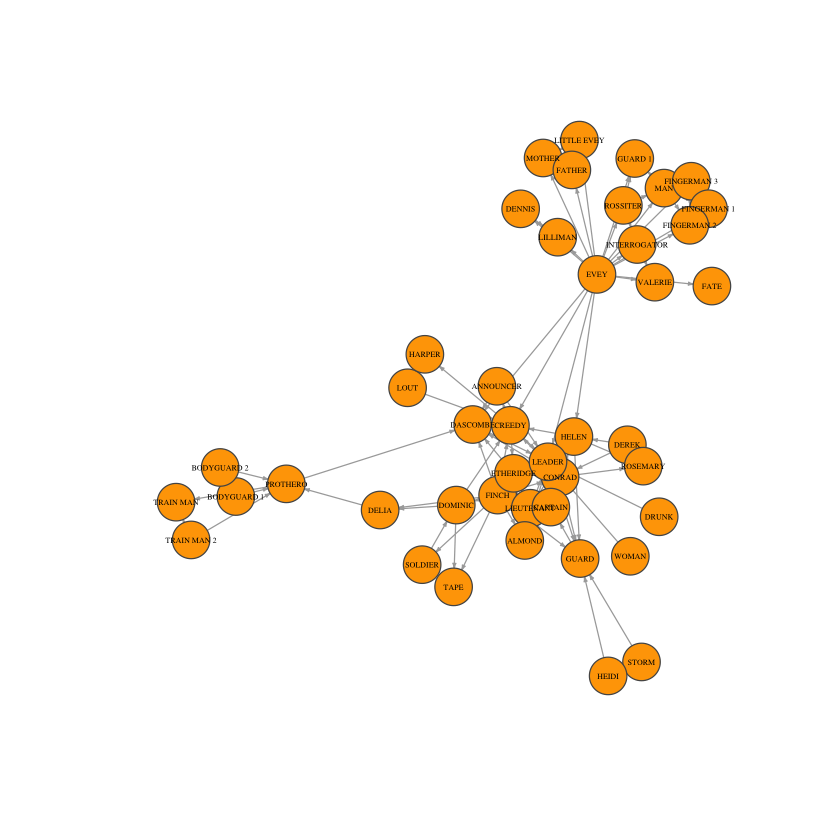

In [6]:
plot(V_net, edge.arrow.size=.2, edge.curved=0,
vertex.color="orange", vertex.frame.color="#555555", vertex.label=V(V_net)$media, 
     vertex.label.color="black", vertex.label.cex=.4, vertex.size=14)

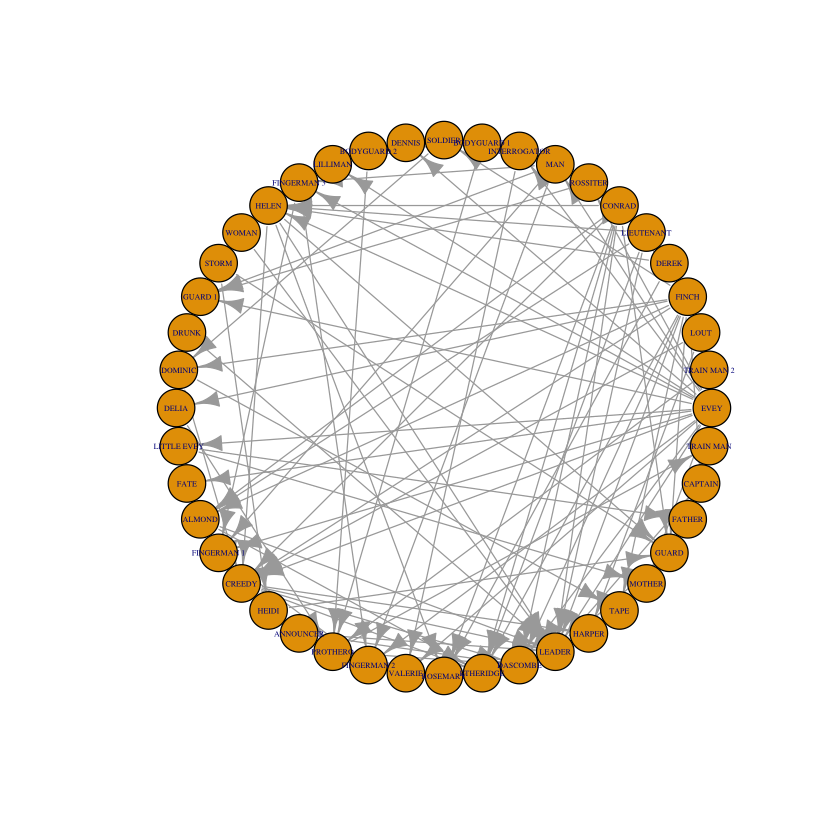

In [7]:
l <- layout_in_circle(V_net) 
plot(V_net, layout=l,vertex.label.cex=.4, vertex.size=14)

The command below plots all network visualizations available in the igraph package.

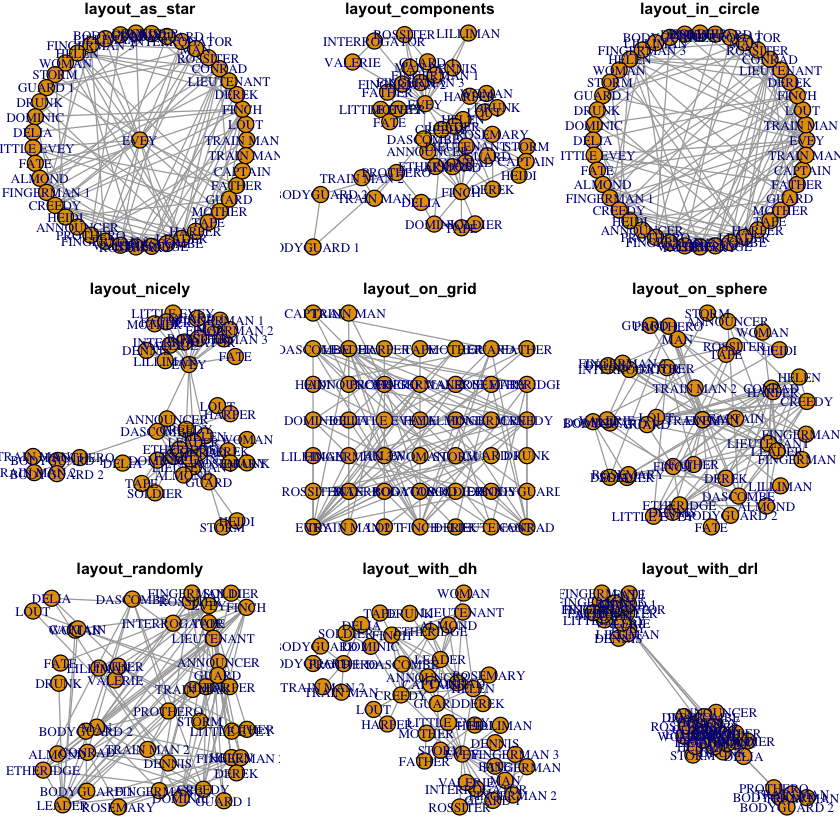

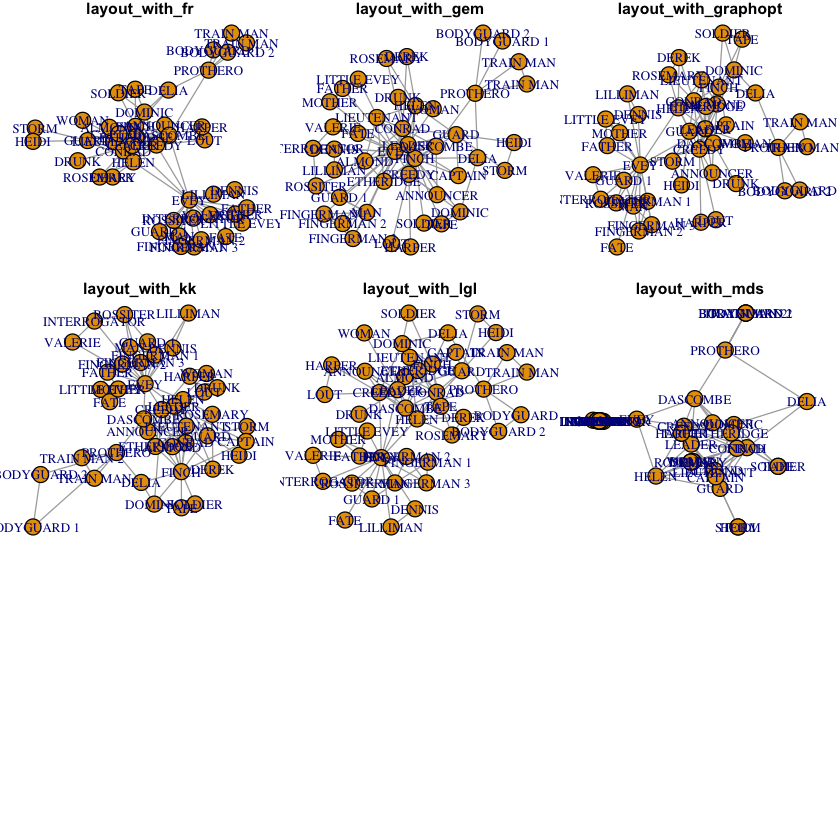

In [8]:
layouts <- grep("^layout_", ls("package:igraph"), value=TRUE)[-1]
# Remove layouts that do not apply to our graph.
layouts <- layouts[!grepl("bipartite|merge|norm|sugiyama|tree", layouts)]
par(mfrow=c(3,3), mar=c(1,1,1,1)) 
for (layout in layouts) {
    #print(layout)
    l <- do.call(layout, list(V_net))
    plot(V_net, edge.arrow.mode=0, layout=l, main=layout) }

#  <span style='color:Purple'>  7. Compute and Visualize Node Centrality  </span>

###  Node centrality:

> **Important when determining who communicates with most people**

- The degree of a node is simply the **number of ties a node has**, e.g. number of friends
- Can be directed:
    - Indegree centrality (number of ties a node receives)
    - Outdegree centrality (the number of ties a node sends)

In [9]:
deg <- sort.int(degree(V_net, mode="all"),decreasing=TRUE,index.return=FALSE)
print(deg)

        EVEY       LEADER        FINCH       CONRAD       CREEDY        HELEN 
          18           14           13           11           11            8 
    DASCOMBE    ETHERIDGE        GUARD   LIEUTENANT          MAN     PROTHERO 
           8            7            7            6            6            6 
     DOMINIC       ALMOND     ROSSITER  FINGERMAN 3  FINGERMAN 1  FINGERMAN 2 
           5            5            4            4            4            4 
       DEREK INTERROGATOR      GUARD 1        DELIA  LITTLE EVEY    ANNOUNCER 
           3            3            3            3            3            3 
    ROSEMARY       MOTHER       FATHER      CAPTAIN  TRAIN MAN 2         LOUT 
           3            3            3            3            2            2 
 BODYGUARD 1      SOLDIER       DENNIS  BODYGUARD 2     LILLIMAN        STORM 
           2            2            2            2            2            2 
       HEIDI      VALERIE       HARPER         TAPE 

###  TOP 10 nodes that communicate with more people

In [10]:
head(deg,10)

EVEY     LEADER      FINCH     CONRAD     CREEDY      HELEN   DASCOMBE 
        18         14         13         11         11          8          8 
 ETHERIDGE      GUARD LIEUTENANT 
         7          7          6

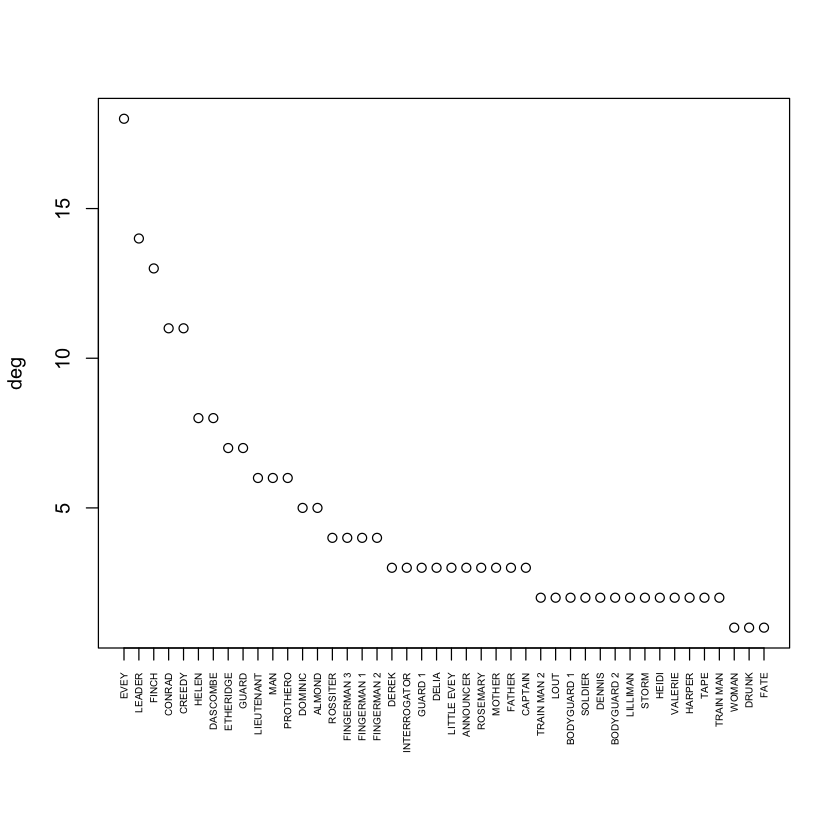

In [11]:
par(mar=c(8, 4.1, 4.1, 2.1))
plot(deg, xaxt="n", xlab= "")
axis(1, at = seq(1,44), labels=names(deg), las = 3, cex.axis=0.5)

Evey is the node with highest centrality, meaning the person with the highest number of friends.

#  <span style='color:Purple'>  8. Compute and Visualize Normalized Node Centrality  </span>

In [12]:
deg2 <- sort.int(degree(V_net, mode = "all", normalized = T),decreasing=TRUE,index.return=FALSE)
print(deg2)

        EVEY       LEADER        FINCH       CONRAD       CREEDY        HELEN 
  0.41860465   0.32558140   0.30232558   0.25581395   0.25581395   0.18604651 
    DASCOMBE    ETHERIDGE        GUARD   LIEUTENANT          MAN     PROTHERO 
  0.18604651   0.16279070   0.16279070   0.13953488   0.13953488   0.13953488 
     DOMINIC       ALMOND     ROSSITER  FINGERMAN 3  FINGERMAN 1  FINGERMAN 2 
  0.11627907   0.11627907   0.09302326   0.09302326   0.09302326   0.09302326 
       DEREK INTERROGATOR      GUARD 1        DELIA  LITTLE EVEY    ANNOUNCER 
  0.06976744   0.06976744   0.06976744   0.06976744   0.06976744   0.06976744 
    ROSEMARY       MOTHER       FATHER      CAPTAIN  TRAIN MAN 2         LOUT 
  0.06976744   0.06976744   0.06976744   0.06976744   0.04651163   0.04651163 
 BODYGUARD 1      SOLDIER       DENNIS  BODYGUARD 2     LILLIMAN        STORM 
  0.04651163   0.04651163   0.04651163   0.04651163   0.04651163   0.04651163 
       HEIDI      VALERIE       HARPER         TAPE 

### TOP 10 nodes that communicate with more people

In [13]:
head(deg2,10)

EVEY     LEADER      FINCH     CONRAD     CREEDY      HELEN   DASCOMBE 
 0.4186047  0.3255814  0.3023256  0.2558140  0.2558140  0.1860465  0.1860465 
 ETHERIDGE      GUARD LIEUTENANT 
 0.1627907  0.1627907  0.1395349

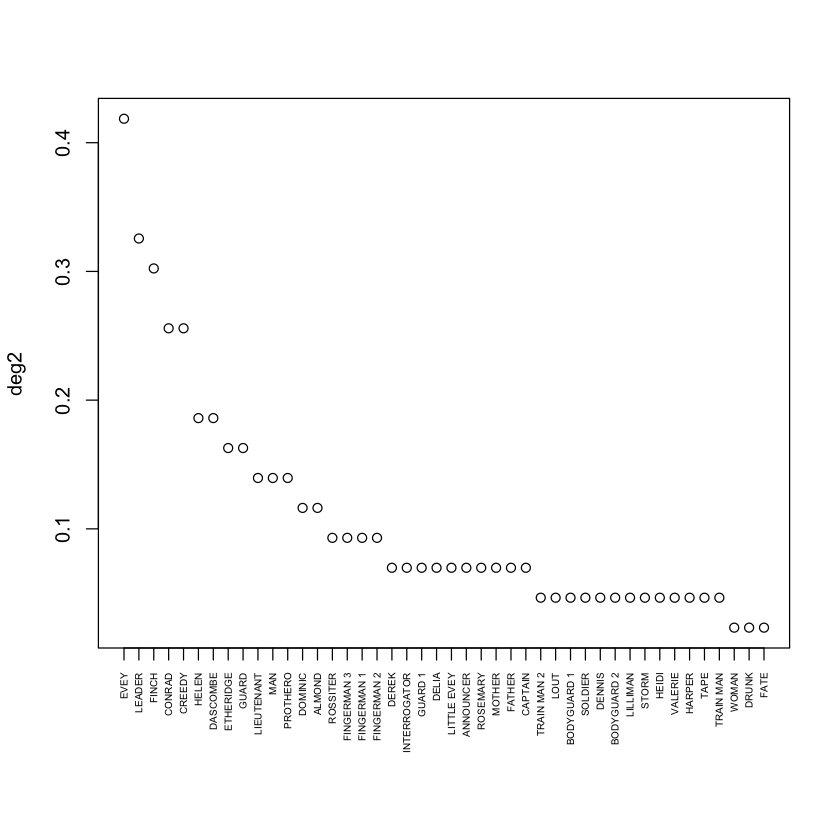

In [14]:
par(mar=c(8, 4.1, 4.1, 2.1))
plot(deg2, xaxt="n", xlab= "")
axis(1, at = seq(1,44), labels=names(deg2), las = 3, cex.axis=0.5)

#  <span style='color:Purple'>  9. Compute and Visualize Node Closeness Centrality  </span>

### Closeness centrality:

> **Important when determining who reaches others most directly.**

Nodes with high closeness centrality are close to all other nodes, that is, they can reach all other nodes in only a few steps. Those with low closeness are distant from the others.

In [15]:
clos <- sort.int(closeness(V_net, mode = "all", weights = NA),
                 decreasing=TRUE,index.return=FALSE)

###  TOP 10 nodes that reach others more directly:

In [16]:
head(clos,10)

LEADER        EVEY    DASCOMBE      CREEDY       HELEN       FINCH 
0.013157895 0.012987013 0.012500000 0.012345679 0.011111111 0.010989011 
     CONRAD   ETHERIDGE       GUARD     DOMINIC 
0.010752688 0.010101010 0.009615385 0.009523810

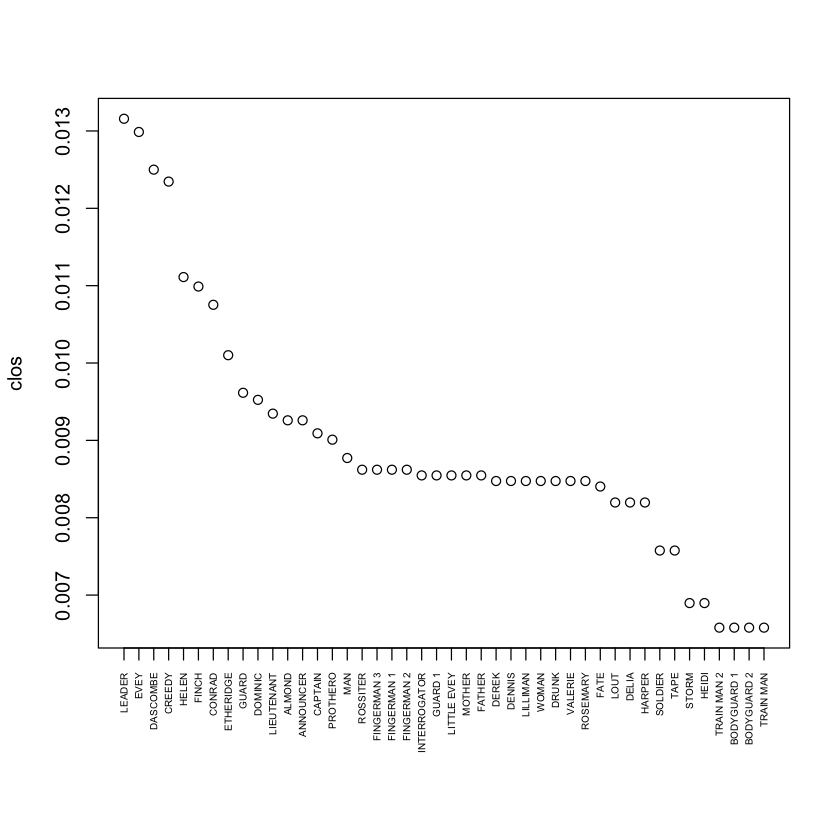

In [17]:
par(mar=c(8, 4.1, 4.1, 2.1))
plot(clos, xaxt="n", xlab= "")
axis(1, at = seq(1,44), labels=names(clos), las = 3, cex.axis=0.5)

#  <span style='color:Purple'>  10. Compute and Visualize Node Eigenvector Centrality  </span>

### Eigenvector centrality:

> **Important when determining who has the strongest influence**

Weights the connections: Connections to high- scoring contribute more than connections to low- scoring nodes

In [18]:
eig <- eigen_centrality(V_net, directed=F, weights=NA)
eig_v <- sort.int(eig$vector,decreasing=TRUE,index.return=FALSE)
print(eig_v)

      LEADER       CONRAD        FINCH       CREEDY    ETHERIDGE     DASCOMBE 
  1.00000000   0.87855769   0.87548069   0.80834080   0.69748063   0.69022266 
       HELEN         EVEY   LIEUTENANT       ALMOND        GUARD    ANNOUNCER 
  0.62895977   0.61527239   0.59760818   0.52537327   0.49817826   0.32418800 
     CAPTAIN      DOMINIC     ROSEMARY        DEREK          MAN        DELIA 
  0.30798167   0.27879794   0.22476296   0.22476296   0.16538770   0.16537950 
     SOLDIER         TAPE  FINGERMAN 2  FINGERMAN 3  FINGERMAN 1     ROSSITER 
  0.14976737   0.14976737   0.13678648   0.13678648   0.13678648   0.13077625 
       WOMAN        DRUNK       HARPER         LOUT     PROTHERO      GUARD 1 
  0.12974976   0.12974976   0.12051938   0.12051938   0.12032492   0.11825864 
INTERROGATOR  LITTLE EVEY       MOTHER       FATHER      VALERIE       DENNIS 
  0.10899263   0.10780741   0.10780741   0.10780741   0.09397321   0.09173389 
    LILLIMAN         FATE        HEIDI        STORM 

### Top 10 nodes with most influence

In [19]:
head(eig_v,10)

LEADER     CONRAD      FINCH     CREEDY  ETHERIDGE   DASCOMBE      HELEN 
 1.0000000  0.8785577  0.8754807  0.8083408  0.6974806  0.6902227  0.6289598 
      EVEY LIEUTENANT     ALMOND 
 0.6152724  0.5976082  0.5253733

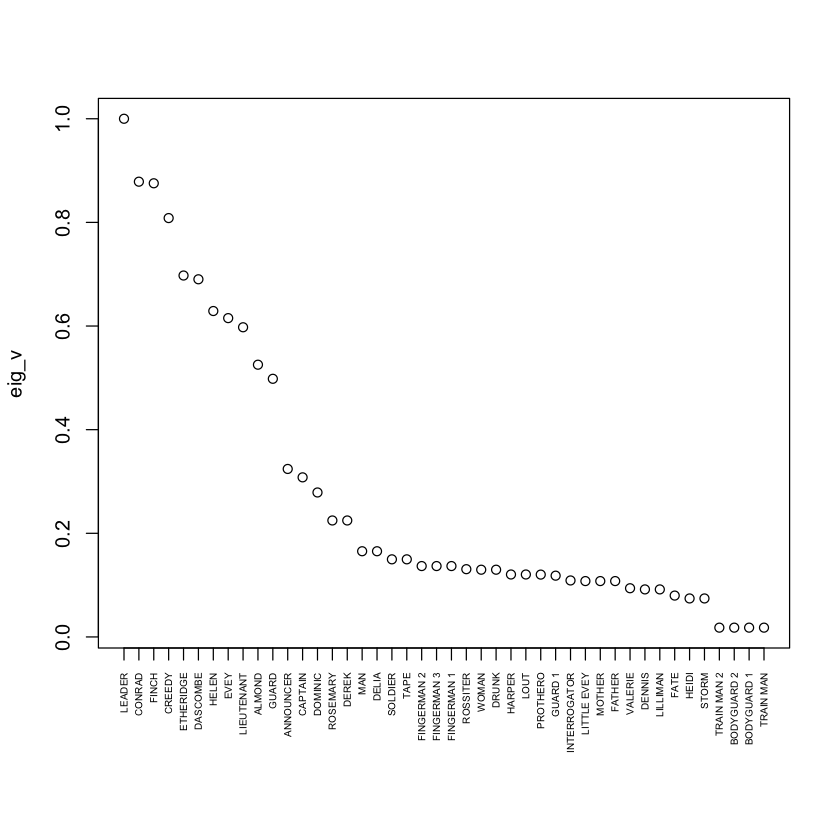

In [20]:
par(mar=c(8, 4.1, 4.1, 2.1))
plot(eig_v, xaxt="n", xlab= "")
axis(1, at = seq(1,44), labels=names(eig_v), las = 3, cex.axis=0.5)

# <span style='color:Purple'>  11. Compute and Visualize Node Betweenness Centrality  </span>


### Betweenness centrality:

> **Important when determining who is involved in most conversations**

- Important nodes are important for connecting other nodes among each other.
- The betweenness centrality of a node is defined as the number of shortest paths among all other nodes that pass through this node.

In [21]:
bet <- betweenness(V_net, directed=F, weights=NA)
bet <- sort.int(bet,decreasing=TRUE,index.return=FALSE)
print(bet)

        EVEY       LEADER     DASCOMBE     PROTHERO       CREEDY        FINCH 
  479.000000   204.433333   197.966667   163.700000   149.733333   126.850000 
       GUARD        HELEN       CONRAD        DELIA      DOMINIC    ETHERIDGE 
   84.333333    79.616667    54.116667    21.583333    21.033333     3.850000 
         MAN   LIEUTENANT     ROSSITER INTERROGATOR  TRAIN MAN 2         LOUT 
    3.000000     1.283333     1.000000     0.500000     0.000000     0.000000 
       DEREK  BODYGUARD 1      SOLDIER       DENNIS  BODYGUARD 2     LILLIMAN 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
 FINGERMAN 3        WOMAN        STORM      GUARD 1        DRUNK  LITTLE EVEY 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
        FATE       ALMOND  FINGERMAN 1        HEIDI    ANNOUNCER  FINGERMAN 2 
    0.000000     0.000000     0.000000     0.000000     0.000000     0.000000 
     VALERIE     ROSEMARY       HARPER         TAPE 

### Top 10 nodes involved in more conversations

In [22]:
head(bet,10)

EVEY    LEADER  DASCOMBE  PROTHERO    CREEDY     FINCH     GUARD     HELEN 
479.00000 204.43333 197.96667 163.70000 149.73333 126.85000  84.33333  79.61667 
   CONRAD     DELIA 
 54.11667  21.58333

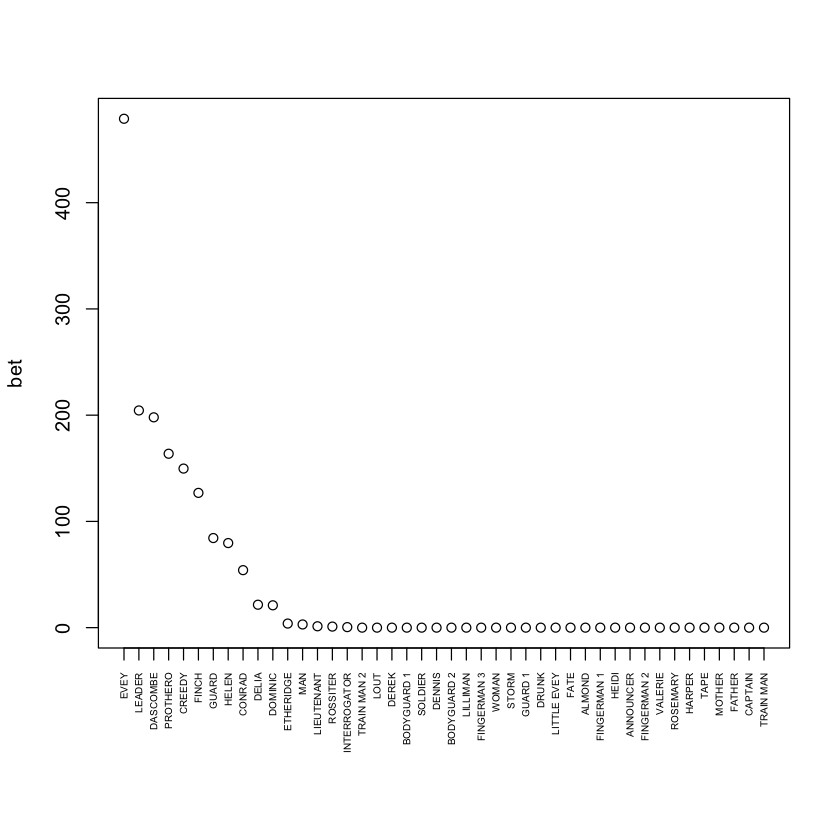

In [23]:
par(mar=c(8, 4.1, 4.1, 2.1))
plot(bet, xaxt="n", xlab= "")
axis(1, at = seq(1,44), labels=names(bet), las = 3, cex.axis=0.5)